In [22]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Hide warning messages in notebook
import warnings

warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
# mouse_drug_data_to_load = "../Resources/mouse_drug_data.csv"
# clinical_trial_data_to_load = "Resources/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

clinic_data = pd.read_csv("Resources/clinicaltrial_data.csv")
mice_data = pd.read_csv("Resources/mouse_drug_data.csv")
print(type(mice_data))
# Combine the data into a single dataset

# mrg = m_df.merge(c_df, how='left', left_on="Mouse ID", right_on="Mouse ID")

mrg2 = mice_data.merge(clinic_data, how='left', left_on ="Mouse ID", right_on="Mouse ID")

#type(mrg2)

# Display the data table for preview

mrg2.head()

<class 'pandas.core.frame.DataFrame'>


Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2

## Tumor Response to Treatment

In [23]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tvm = mrg2.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tvm = pd.DataFrame(tumor_vols_mean)

# Flatten the column headings
tvm = tvm.reset_index()

# Preview DataFrame
tvm.head()

index       Drug  Timepoint  Tumor Volume (mm3)
0      0  Capomulin          0           45.000000
1      1  Capomulin          5           44.266086
2      2  Capomulin         10           43.084291
3      3  Capomulin         15           42.064317
4      4  Capomulin         20           40.716325

In [24]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tvs = mrg2.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tvs = pd.DataFrame(tvs)

# Preview DataFrame
tvs.head().reset_index()

Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0            0.000000
1  Capomulin          5            0.448593
2  Capomulin         10            0.702684
3  Capomulin         15            0.838617
4  Capomulin         20            0.909731

In [25]:
# Minor Data Munging to Re-Format the Data Frames
tvm = tvm.reset_index()
tvm_p = tvm.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

tvs = tvs.reset_index()
tvm_p2 = tvs.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# Preview that Reformatting worked
tvm_p2.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol   Placebo  \
Timepoint                                                                 
0           0.000000  0.000000   0.000000  0.000000  0.000000  0.000000   
5           0.448593  0.164505   0.235102  0.264819  0.202385  0.218091   
10          0.702684  0.236144   0.282346  0.357421  0.319415  0.402064   
15          0.838617  0.332053   0.357705  0.580268  0.444378  0.614461   
20          0.909731  0.359482   0.476210  0.726484  0.595260  0.839609   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0          0.000000  0.000000  0.000000   0.000000  
5          0.231708  0.482955  0.239862   0.188950  
10         0.376195  0.720225  0.433678   0.263949  
15         0.466109  0.770432  0.493261   0.370544  
20         0.555181  0.786199  0.621889   0.533182

In [26]:
tvm_p.head()

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334

In [28]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vols_pivot_mean.index, tvm_p["Capomulin"], yerr=tvs["Capomulin"], color="r",markersize=5, marker="o", linestyle="dashed")
plt.errorbar(tumor_vols_pivot_mean.index, tvm_p["Infubinol"], yerr=tvs["Infubinol"], color="b",markersize=5, marker="^",  linestyle="dashed")
plt.errorbar(tumor_vols_pivot_mean.index, tvm_p["Ketapril"], yerr=tvs["Ketapril"], color="g",markersize=5, marker="s",  linestyle="dashed")
plt.errorbar(tumor_vols_pivot_mean.index, tvm_p["Placebo"], yerr=tvs["Placebo"], color="k", markersize=5, marker="d", linestyle="dashed")

plt.title("Tumor Res by Treatment")
plt.ylabel("Tumor Volume")
plt.xlabel("Time")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Fig1.png")

# Show the Figure
plt.show()

KeyError: 'Capomulin'

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [ ]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = clinical_data_complete.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
met_sites_mean = pd.DataFrame(met_sites_mean)

# Preview DataFrame
met_sites_mean.head()

In [ ]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_sem = clinical_data_complete.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
met_sites_sem = pd.DataFrame(met_sites_sem)

# Preview DataFrame
met_sites_sem.head()

In [ ]:
# Minor Data Munging to Re-Format the Data Frames
met_sites_mean = met_sites_mean.reset_index()
met_sites_pivot_mean = met_sites_mean.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

met_sites_sem = met_sites_sem.reset_index()
met_sites_pivot_sem = met_sites_sem.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_sites_pivot_mean.head()

In [ ]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Capomulin"], yerr=met_sites_pivot_sem["Capomulin"], color="r", marker="o", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Infubinol"], yerr=met_sites_pivot_sem["Infubinol"], color="b", marker="^", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Ketapril"], yerr=met_sites_pivot_sem["Ketapril"], color="g", marker="s", markersize=5, linestyle="dashed", linewidth=0.50)
plt.errorbar(met_sites_pivot_mean.index, met_sites_pivot_mean["Placebo"], yerr=met_sites_pivot_sem["Placebo"], color="k", marker="d", markersize=5, linestyle="dashed", linewidth=0.50)

plt.title("Metastatic Spread During Treatment")
plt.ylabel("Met. Sites")
plt.xlabel("Treatment Duration (Days)")
plt.grid(axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Fig2.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [31]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_count = mrg2.groupby(["Drug", "Timepoint"]).count()["Tumor Volume (mm3)"]

# Convert to DataFrame
survival_count = pd.DataFrame({"Mouse Count": survival_count})

# Preview DataFrame
survival_count.head().reset_index()

Drug  Timepoint  Mouse Count
0  Capomulin          0           25
1  Capomulin          5           25
2  Capomulin         10           25
3  Capomulin         15           24
4  Capomulin         20           23

In [32]:
# Minor Data Munging to Re-Format the Data Frames
survival_count = survival_count.reset_index()
survival_count_pivot = survival_count.pivot(index="Timepoint", columns="Drug")["Mouse Count"]

# Preview the Data Frame
survival_count_pivot.head()

Drug       Capomulin  Ceftamin  Infubinol  Ketapril  Naftisol  Placebo  \
Timepoint                                                                
0                 25        25         25        25        25       25   
5                 25        21         25        23        23       24   
10                25        20         21        22        21       24   
15                24        19         21        19        21       20   
20                23        18         20        19        20       19   

Drug       Propriva  Ramicane  Stelasyn  Zoniferol  
Timepoint                                           
0                26        25        26         25  
5                25        25        25         24  
10               23        24        23         22  
15               17        24        23         21  
20               17        23        21         17

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig3.png'

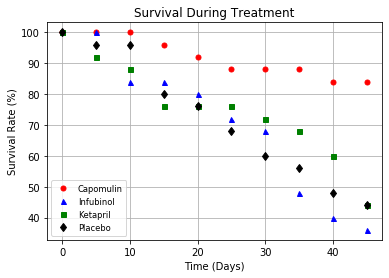

In [34]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * survival_count_pivot["Capomulin"] / 25, "ro",  markersize=5)
plt.plot(100 * survival_count_pivot["Infubinol"] / 25, "b^",  markersize=5)
plt.plot(100 * survival_count_pivot["Ketapril"] / 25, "gs",  markersize=5)
plt.plot(100 * survival_count_pivot["Placebo"] / 25 , "kd", markersize=6)
plt.title("Survival During Treatment")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Time (Days)")
plt.grid(True)
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], loc="best", fontsize="small", fancybox=True)

# Save the Figure
plt.savefig("analysis/Fig3.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [40]:
# Calculate the percent changes for each drug
tumor_pct_change =  100 * (tvpm.iloc[-1] - tvpm.iloc[0]) / tvpm.iloc[0]
tumor_pct_change_sem =  100 * (tvm_p2.iloc[-1] - tvm_p2.iloc[0]) / tvm_p2.iloc[0]

# Display the data to confirm
tumor_pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

FileNotFoundError: [Errno 2] No such file or directory: 'analysis/Fig4.png'

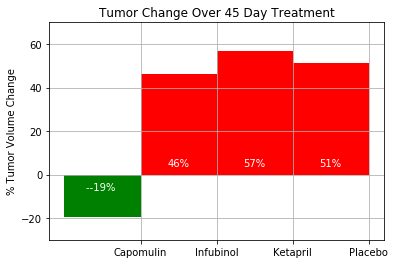

In [41]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (tumor_pct_change["Capomulin"], 
               tumor_pct_change["Infubinol"], 
               tumor_pct_change["Ketapril"], 
               tumor_pct_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))  
width = 1
rectsPass = ax.bar(ind[0], pct_changes[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_changes[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")

def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls
autolabelPass(rectsPass)
autolabelFail(rectsFail)

# Save the Figure
fig.savefig("analysis/Fig4.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)